# import packages
Let's start by importing the following packages!
* requests
* BeautifulSoup
* seaborn
* matplotlib
* pandas
* re

In [1]:
# import package
import requests 
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

# crawler THSR information
Let's start to crawl the imformation of each station of THSR!
* Target web: [THSR Homepage](https://www.thsrc.com.tw)  
* Choose each station:
    1. Homepage -> Travel Information -> Stations
    2. choose different stations by changing url
* Task:
    1. crawler the name, address, operation hours and ticketing hours of each station
    2. organize into a DataFrame

In [2]:
# setting each station name and their url
url='https://www.thsrc.com.tw/ArticleContent/2f940836-cedc-41ef-8e28-c2336ac8fe68'
url2='https://www.thsrc.com.tw/ArticleContent/977abb69-413a-4ccf-a109-0272c24fd490'
url3='https://www.thsrc.com.tw/ArticleContent/e6e26e66-7dc1-458f-b2f3-71ce65fdc95f'
url4='https://www.thsrc.com.tw/ArticleContent/fbd828d8-b1da-4b06-a3bd-680cdca4d2cd'
url5='https://www.thsrc.com.tw/ArticleContent/a7a04c89-900b-4798-95a3-c01c455622f4'
url6='https://www.thsrc.com.tw/ArticleContent/e8fc2123-2aaf-46ff-ad79-51d4002a1ef3'
url7='https://www.thsrc.com.tw/ArticleContent/3301e395-46b8-47aa-aa37-139e15708779'
url8='https://www.thsrc.com.tw/ArticleContent/38b8c40b-aef0-4d66-b257-da96ec51620e'
url9='https://www.thsrc.com.tw/ArticleContent/5f4c7bb0-c676-4e39-8d3c-f12fc188ee5f'
url10='https://www.thsrc.com.tw/ArticleContent/60831846-f0e4-47f6-9b5b-46323ebdcef7'
url11='https://www.thsrc.com.tw/ArticleContent/9c5ac6ca-ec89-48f8-aab0-41b738cb1814'
url12='https://www.thsrc.com.tw/ArticleContent/f2519629-5973-4d08-913b-479cce78a356'
list1=[url,url2,url3,url4,url5,url6,url7,url8,url9,url10,url11,url12]


r=requests.get(url)
soup = BeautifulSoup(r.text,"html.parser")

station=soup.find('div',class_="nav nav-tabs si-tab swiper-wrapper" )

station_name=station.text.split('\n')[1:13]
station_name



['南港', '台北', '板橋', '桃園', '新竹', '苗栗', '台中', '彰化', '雲林', '嘉義', '台南', '左營']

In [4]:
# crawler the address of each station
address_=[]
for i in list1 :
    r=requests.get(i)
    soup = BeautifulSoup(r.text,"html.parser")
    address=soup.find_all('td')
    address_.append(address[0].text.strip())   
address_


['台北市南港區南港路一段313號',
 '台北市北平西路3號',
 '新北市板橋區縣民大道二段7號',
 '桃園市中壢區高鐵北路一段6號',
 '新竹縣竹北市高鐵七路6號',
 '苗栗縣後龍鎮高鐵三路268號',
 '台中市烏日區站區二路8號',
 '彰化縣田中鎮站區路二段99號',
 '雲林縣虎尾鎮站前東路301號',
 '嘉義縣太保市高鐵西路168號',
 '台南市歸仁區歸仁大道100號',
 '高雄市左營區高鐵路105號']

In [5]:
# crawler the operation hours and ticketing hours of each station
operation=[]
ticket_hour=[]
for i in list1 :
    r=requests.get(i)
    soup = BeautifulSoup(r.text,"html.parser")
    address=soup.find_all('td')
    operation.append((address[1].text.split('營業時間：')[1]))
    ticket_hour.append((address[2].text.split('售票時間：')[1]))



['05:50 ~ 末班車發車時間',
 '06:00 ~ 末班車發車時間',
 '06:00 ~ 末班車發車時間',
 '06:20 ~ 末班車發車時間 ',
 '06:15 ~ 末班車發車時間',
 '06:05 ~ 末班車發車時間',
 '05:40 ~ 末班車發車時間',
 '06:20~末班車發車時間',
 '06:15~末班車發車時間',
 '06:00~末班車發車時間',
 '05:45~末班車發車時間 ',
 '05:25~末班車發車時間 ']

['05:50 ~ 24:00',
 '06:00 ~ 24:00',
 '06:00 ~ 24:00',
 '06:20 ~ 23:45',
 '06:15 ~ 23:45',
 '06:05 ~ 23:45',
 '05:40 ~ 24:00',
 '06:20 ~ 24:00',
 '06:15 ~ 23:45',
 '06:00 ~ 23:45',
 '05:45 ~ 24:00',
 '05:25 ~ 24:00']

In [17]:
# create a DataFrame
df=pd.DataFrame(list(zip(station_name,address_,operation,ticket_hour)),columns=['station','address','operation','ticket hour'])
df

,station,address,operation,ticket hour
0,南港,台北市南港區南港路一段313號,05:50 ~ 24:00,05:50 ~ 末班車發車時間
1,台北,台北市北平西路3號,06:00 ~ 24:00,06:00 ~ 末班車發車時間
2,板橋,新北市板橋區縣民大道二段7號,06:00 ~ 24:00,06:00 ~ 末班車發車時間
3,桃園,桃園市中壢區高鐵北路一段6號,06:20 ~ 23:45,06:20 ~ 末班車發車時間
4,新竹,新竹縣竹北市高鐵七路6號,06:15 ~ 23:45,06:15 ~ 末班車發車時間
5,苗栗,苗栗縣後龍鎮高鐵三路268號,06:05 ~ 23:45,06:05 ~ 末班車發車時間
6,台中,台中市烏日區站區二路8號,05:40 ~ 24:00,05:40 ~ 末班車發車時間
7,彰化,彰化縣田中鎮站區路二段99號,06:20 ~ 24:00,06:20~末班車發車時間
8,雲林,雲林縣虎尾鎮站前東路301號,06:15 ~ 23:45,06:15~末班車發車時間
9,嘉義,嘉義縣太保市高鐵西路168號,06:00 ~ 23:45,06:00~末班車發車時間


# Crawler GDP and CPI
Let's start to crawl GDP and CPI!
* Target web: 
    1. [Wiki GDP](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal))  
    2. [Wiki CPI](https://en.wikipedia.org/wiki/Corruption_Perceptions_Index)
* Task:
    1. crawler GDP table (top 50: United States ~ New Zealand)
    2. organize into a DataFrame (columns: Country, Region, IMF_Estimate, IMF_Year, United_Nations_Estimate, United_Nations_Year, World_Bank_Estimate, World_Bank_Year)
    3. crawler CPI table which contains country and 2020 CPI (top 100: Denmark ~ Suriname)
    4. organize into a DataFrame (columns: Country, CPI_2020)
    5. merge GDP(DataFrame) and CPI(DataFrame), based on Country of GDP
    6. plot and text the names of GDP top 10 countrys

In [92]:
# crawler GDP
url='https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
r=requests.get(url)
soup = BeautifulSoup(r.text,"html.parser")

a=soup.find_all('td')
b=[]
for i in a :
    i=i.text.strip()
    b.append(i)
    #print(i)
c=b[5:405]

gdp = {'country':[], 'region':[], 'IMF_Estimate':[], 'IMF_Year':[],'United_Nations_Estimate':[],
                      'United_Nations_Year':[],'World_Bank_Estimate':[],'World_Bank_Year':[]}
keys=list(gdp.keys())
for r, value in enumerate(c):
    gdp[keys[r % 8]].append(value)
    
#create DataFrame
df=pd.DataFrame(gdp)
imf=[]
UNY=[]
for i in df['IMF_Year'] :
    if i.isdigit() is True :
        imf.append(i)
    if i.isdigit() is False :
        a=i.split(']')
        i=a[1].strip()
        imf.append(i)
for i in df['United_Nations_Year'] :
    if i.isdigit() is True :
        UNY.append(i)
    if i.isdigit() is False :
        a=i.split(']')
        i=a[1].strip()
        UNY.append(i)
        
df['IMF_Year']=imf
df['United_Nations_Year']=UNY
GDP=df
GDP

,country,region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year
0,United States,Americas,"22,675,271",2021,"21,433,226",2019,"20,936,600",2020
1,China,Asia,"16,642,318",2021,"14,342,933",2019,"14,722,731",2020
2,Japan,Asia,"5,378,136",2021,"5,082,465",2019,"4,975,415",2020
3,Germany,Europe,"4,319,286",2021,"3,861,123",2019,"3,806,060",2020
4,United Kingdom,Europe,"3,124,650",2021,"2,826,441",2019,"2,707,744",2020
5,India,Asia,"3,049,704",2021,"2,891,582",2019,"2,622,984",2020
6,France,Europe,"2,938,271",2021,"2,715,518",2019,"2,603,004",2020
7,Italy,Europe,"2,106,287",2021,"2,003,576",2019,"1,886,445",2020
8,Canada,Americas,"1,883,487",2021,"1,741,496",2019,"1,643,408",2020
9,South Korea,Asia,"1,806,707",2021,"1,646,539",2019,"1,630,525",2020


In [11]:
# create GDP DataFrame

,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year
0,United States,Americas,22675271,2021,21433226,2019,20936600,2020
1,China,Asia,16642318,2021,14342933,2019,14722731,2020
2,Japan,Asia,5378136,2021,5082465,2019,5064873,2019
3,Germany,Europe,4319286,2021,3861123,2019,3806060,2020
4,United Kingdom,Europe,3124650,2021,2826441,2019,2707744,2020
5,India,Asia,3049704,2021,2891582,2019,2622984,2020
6,France,Europe,2938271,2021,2715518,2019,2603004,2020
7,Italy,Europe,2106287,2021,2003576,2019,1886445,2020
8,Canada,Americas,1883487,2021,1741496,2019,1643408,2020
9,South Korea,Asia,1806707,2021,1646539,2019,1630525,2020


In [93]:
# crawler CPI
url1='https://en.wikipedia.org/wiki/Corruption_Perceptions_Index'
r=requests.get(url1)
soup = BeautifulSoup(r.text,"html.parser")
a=soup.find_all('td')

b=[]
for i in a :
    i=i.text.strip()
    b.append(i)
    
#b.index('Denmark')
#b.index('Suriname')
d=b[23:1906]

In [94]:
# CPI DataFrame
cpi = {'country':[], 'CPI' :[]}

keys=list(cpi.keys())
for r, value in enumerate(d):
    if r %19 <2 :
        cpi[keys[r % 19]].append(value)

CPI=pd.DataFrame(cpi)
CPI

,country,CPI
0,Denmark,88
1,New Zealand,88
2,Finland,85
3,Singapore,85
4,Sweden,85
...,...,...
95,Kazakhstan,38
96,Peru,38
97,Serbia,38
98,Sri Lanka,38


In [95]:
# merge GDP and CPI DataFrame
M=pd.merge(GDP,CPI)
M

,country,region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year,CPI
0,United States,Americas,"22,675,271",2021,"21,433,226",2019,"20,936,600",2020,67
1,China,Asia,"16,642,318",2021,"14,342,933",2019,"14,722,731",2020,42
2,Japan,Asia,"5,378,136",2021,"5,082,465",2019,"4,975,415",2020,74
3,Germany,Europe,"4,319,286",2021,"3,861,123",2019,"3,806,060",2020,80
4,United Kingdom,Europe,"3,124,650",2021,"2,826,441",2019,"2,707,744",2020,77
5,India,Asia,"3,049,704",2021,"2,891,582",2019,"2,622,984",2020,40
6,France,Europe,"2,938,271",2021,"2,715,518",2019,"2,603,004",2020,69
7,Italy,Europe,"2,106,287",2021,"2,003,576",2019,"1,886,445",2020,53
8,Canada,Americas,"1,883,487",2021,"1,741,496",2019,"1,643,408",2020,77
9,South Korea,Asia,"1,806,707",2021,"1,646,539",2019,"1,630,525",2020,61


In [96]:
# plot
INT=[]
for i in M['CPI'] :
    i=int(i)
    #print(i)
    INT.append(i)
M['CPI']=INT


INT1=[]
for i in M['World_Bank_Estimate'] :
    i=re.findall('\d+\.?\d*',i)
    INT1.append(i)
   
       
INT2=[]
for i in INT1[0:13] :
    INT2.append(int(i[0]+i[1]+i[2]))
for i in INT1[13:] :
    INT2.append(int(i[0]+i[1]))
#for i in INT2:
    #print(type(i))


In [98]:
M['World_Bank_Estimate']=INT2
M

,country,region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year,CPI
0,United States,Americas,"22,675,271",2021,"21,433,226",2019,20936600,2020,67
1,China,Asia,"16,642,318",2021,"14,342,933",2019,14722731,2020,42
2,Japan,Asia,"5,378,136",2021,"5,082,465",2019,4975415,2020,74
3,Germany,Europe,"4,319,286",2021,"3,861,123",2019,3806060,2020,80
4,United Kingdom,Europe,"3,124,650",2021,"2,826,441",2019,2707744,2020,77
5,India,Asia,"3,049,704",2021,"2,891,582",2019,2622984,2020,40
6,France,Europe,"2,938,271",2021,"2,715,518",2019,2603004,2020,69
7,Italy,Europe,"2,106,287",2021,"2,003,576",2019,1886445,2020,53
8,Canada,Americas,"1,883,487",2021,"1,741,496",2019,1643408,2020,77
9,South Korea,Asia,"1,806,707",2021,"1,646,539",2019,1630525,2020,61


In [99]:
#plot
color = ['metallic blue','light rose', 'sand', 'turtle green', 
         'light lilac', 'dusky purple', 'light blue grey']
sns.xkcd_palette(color)
sns.set_theme(style='whitegrid', palette = sns.xkcd_palette(color))

<AxesSubplot:xlabel='CPI', ylabel='World_Bank_Estimate'>

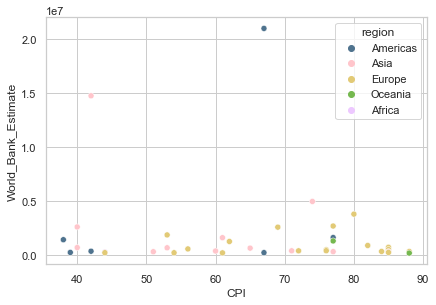

In [101]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
sns.scatterplot(x = M.CPI, y = M.World_Bank_Estimate,hue=M.region)